### Step 1:
Load the dataset

In [1]:
import pandas as pd
trip_advi_df = pd.read_csv(r'C:\Users\admin\Desktop\Machine Learning\Unsupervised\K-means clustering\Jewellary.csv')
trip_advi_df

,Age,Income,SpendingScore,savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775390
501,93,19934,0.203140,17969.693770
502,90,35297,0.355149,16091.401950
503,91,20681,0.354679,18401.088440


In [2]:
trip_Final=trip_advi_df.copy()

In [3]:
trip_advi_df.columns

Index(['Age', 'Income', 'SpendingScore', 'savings'], dtype='object')

####  Removing Unnecessary variable

In [4]:
trip_advi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
trip_advi_df.head()

,Age,Income,SpendingScore,savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [6]:
samples = trip_advi_df.values # get all row and columne with header 

samples

array([[5.80000000e+01, 7.77690000e+04, 7.91328777e-01, 6.55982992e+03],
       [5.90000000e+01, 8.17990000e+04, 7.91082047e-01, 5.41766143e+03],
       [6.20000000e+01, 7.47510000e+04, 7.02656952e-01, 9.25899296e+03],
       ...,
       [9.00000000e+01, 3.52970000e+04, 3.55149019e-01, 1.60914019e+04],
       [9.10000000e+01, 2.06810000e+04, 3.54679169e-01, 1.84010884e+04],
       [8.90000000e+01, 3.02670000e+04, 2.89310066e-01, 1.43863519e+04]])

### Step 3:
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [7]:
SSE=[] # empty List
SSE

[]

In [8]:
from sklearn.cluster import KMeans

ks = range(1,6)   #ks=1,2,3,4,5
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # ks = k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k) # k =1,2,3,4,5

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)  # variance or SSE 
    # Inertia: Sum of distances of samplesto their closest cluster center

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
SSE

[665272893776.524,
 187977458445.15778,
 43729705197.74892,
 21452909424.866608,
 17288079673.623955]

#### Elbow Method 

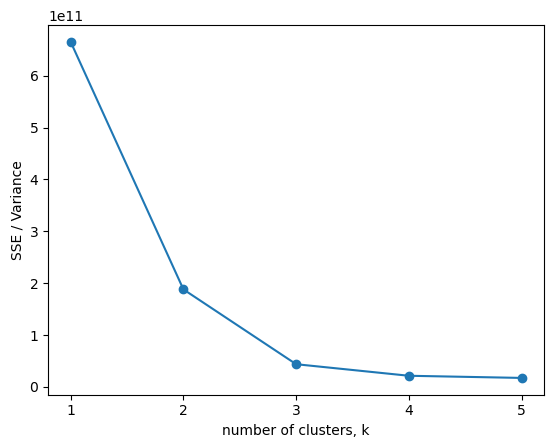

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / Variance')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

# Model or Algorithm

In [11]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [12]:
trip_Final['Cluster_Made'] = model2.fit_predict(samples)
trip_Final.head()

,Age,Income,SpendingScore,savings,Cluster_Made
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2


### Final Cluster Centorids 

In [13]:
model2.cluster_centers_

array([[3.73165829e+01, 1.12977769e+05, 4.27282030e-01, 1.22309820e+04],
       [5.95974843e+01, 7.26749623e+04, 7.65433878e-01, 6.96643626e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04]])

In [14]:
trip_Final.head()

,Age,Income,SpendingScore,savings,Cluster_Made
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2


In [15]:
trip_Final.Cluster_Made.value_counts(ascending=False)

0    199
1    159
2    147
Name: Cluster_Made, dtype: int64

# Business Submission

In [16]:
Submission=trip_Final.loc[:,['Cluster_Made']]
Submission

,Cluster_Made
0,1
1,1
2,1
3,1
4,2
...,...
500,0
501,2
502,2
503,2


In [18]:
import os
os.chdir(r"C:\Users\admin\Desktop\Machine Learning\Unsupervised\K-means clustering")

In [19]:
Submission.to_excel("Trip_output.xlsx",index=False,sheet_name="Output") 

# Finished